# 분산분석[일원,이원] 관련 ADP 기출문제

> 지하철 호선과 월별, 승객수 간 상관관계가 있는지 확인(Type III Anova)
1. 귀무가설과 대립가설 설정하라
2. 통계량을 구하고 대립가설 채택여부를 기술하라
- 기출 : 27회
- 출처 : https://www.datamanim.com/dataset/ADPpb/00/27.html

> A부터 D 그룹에게 각각 같은 설문조사를 하여 1~5번까지의 설문지를 풀었다.
- 문항은 영역별로 나뉘어 있고 영역은 크게 5개이다.
- 각 영역의 세부문항은 4개씩 존재한다.
- 모든 답변은 5점 척도이다.
1. 그룹별로 q1-1문항의 차이가 존재하는지 anova 분석을 시행하라
- 기출 : 17회
- 출처 : https://www.datamanim.com/dataset/ADPpb/00/17.html

# 문제
출제 의도 : **푸는 과정(일원,이원)**을 보기 위함으로 문항별 결론은 일치할 수 있음

1. 사용월, 호선명 두 독립변수에 대한 **정규성과 등분산성을 만족하는지** 확인하라

2. 두 독립변수 모두 **정규성을 만족하지 않는다고 가정하고** 집단간 평균에 차이가 존재하는지 확인하라.

3. 호선명 독립변수가 **정규성은 만족하되 등분산성을 만족하지 않다고 가정하고** 호선별 평균에 차이가 존재하는지 확인하라.

4. 두 독립변수가 모두 **정규성과 등분산성을 만족한다고 가정하고** 아래 지시를 따르라.
- 4-1.  교호작용 효과를 검정하라.
- 4-2. 주효과 검정을 시행하라.
- 4-3. 호선명에 대한 사후분석을 진행하라.


In [ ]:
# pip install pingouin
# pip install scikit_posthocs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
data_1 = pd.read_csv('./drive/MyDrive/data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_2306.csv', encoding='cp949')
data_2 = pd.read_csv('./drive/MyDrive/data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_2305.csv', encoding='cp949')
data_3 = pd.read_csv('./drive/MyDrive/data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_2304.csv', encoding='cp949')

In [4]:
data = pd.concat([data_1, data_2, data_3], axis=0)

In [5]:
data['승객수'] = data.iloc[:, 3:51].apply(lambda x : sum(x), axis=1)

In [6]:
data = data[data['호선명'].isin(['1호선', '2호선', '3호선'])]

In [7]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,승객수
0,202306,1호선,동대문,854,33,11997,2157,9533,7157,14547,...,624,2562,3,247,0,0,0,0,20230703,691929
1,202306,1호선,동묘앞,228,2,3088,1143,3886,5140,7501,...,111,1761,0,331,0,0,0,0,20230703,606251
2,202306,1호선,서울역,677,33,8470,9569,13528,54052,44183,...,2554,2856,0,229,0,0,0,0,20230703,3054194
3,202306,1호선,시청,61,1,2351,4528,3862,24513,7856,...,334,1075,0,36,1,0,0,0,20230703,1486497
4,202306,1호선,신설동,494,24,9258,2481,9513,8392,22078,...,434,2294,1,0,1,0,0,0,20230703,797907


In [61]:
# data.iloc[:, [0,1,2,-1]].to_csv('./drive/MyDrive/data/서울시지하철호선별역별시간대별승하차인원정보.csv', encoding='cp949')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#현재 적용되고 있는 글꼴 확인
print(mpl.rcParams['font.family']) # font
#print(mpl.rcParams['font.size']) # size

#로컬에서 특정 폰트 사용하고 싶을때
#from matplotlib import font_manager,rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font =font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)

#plt.rc('font', family='Malgun Gothic') #맑은 고딕

### 한국어 깨짐 방지
# plt.rc('font', family='NanumGothic')
# mpl.rcParams['axes.unicode_minus'] = False

['sans-serif']


In [12]:
#설치없이 가능한 글꼴 확인
[f.name for f in fm.fontManager.ttflist]
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

['STIXGeneral',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmss10',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmr10',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'Liberation Sans',
 'Humor Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumMyeongjo',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumGothic',
 'NanumBarunGothic',
 'Liberation Serif',
 'Liberation Mono',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'Liberation Mono',
 'NanumSqua

In [13]:
#나눔 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [14]:
### 글꼴 바꾸기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rc('font', family='NanumGothic')

# 데이터 EDA

In [8]:
df = pd.DataFrame(data.groupby(['사용월','호선명'])['승객수'].apply(lambda x : sum(x))).reset_index()

In [9]:
df.head()

,사용월,호선명,승객수
0,202304,1호선,13936039
1,202304,2호선,81940873
2,202304,3호선,30875884
3,202305,1호선,14438886
4,202305,2호선,83047758


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     9 non-null      int64 
 1   호선명     9 non-null      object
 2   승객수     9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


<Axes: xlabel='호선명', ylabel='승객수'>

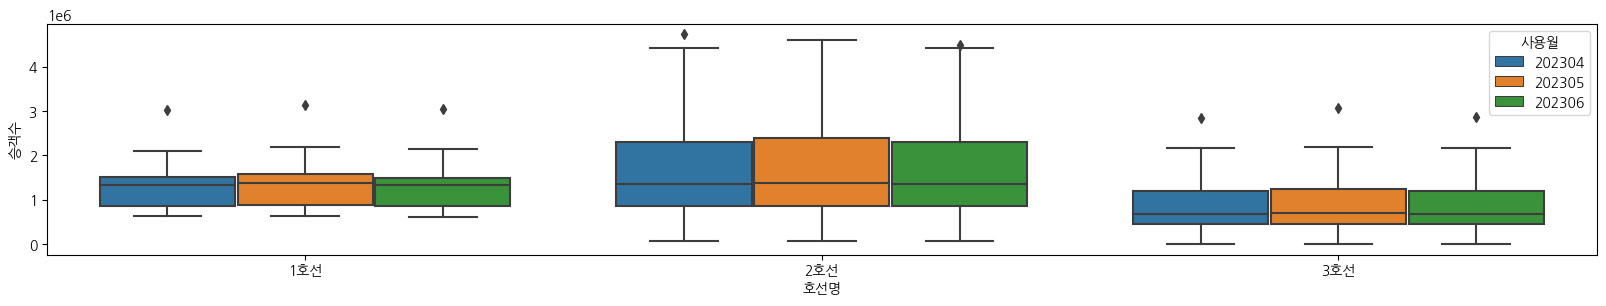

In [39]:
plt.figure(figsize=(20,3))
sns.boxplot(x="호선명", y= "승객수", hue="사용월", data =data)

<Axes: xlabel='호선명', ylabel='승객수'>

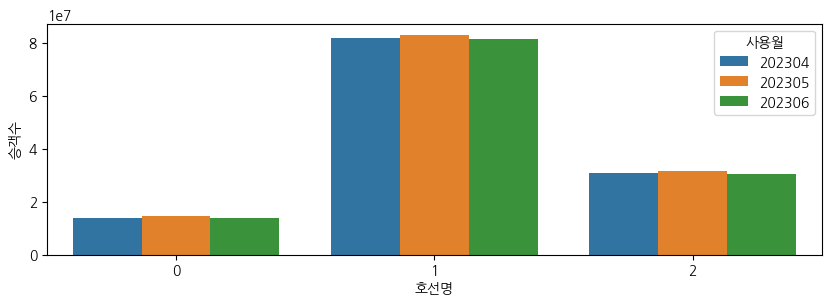

In [40]:
plt.figure(figsize=(10,3))
sns.barplot(x="호선명", y= "승객수", hue="사용월", data =df)

In [53]:
import numpy as np
# 호선명, 사용월별 평균 총 평균수가 테이블 형태로 출력
pd.pivot_table(data, index='사용월', columns='호선명', values='승객수', aggfunc=np.mean)

호선명,1호선,2호선,3호선
사용월,,,
202304,1393603.9,1638817.46,908114.235294
202305,1443888.6,1660955.16,933419.176471
202306,1397714.1,1630393.10,901437.058824


# 정규성 확인
- 각 값마다 정규성을 띄는지 확인한다
- stats.shapiro()
- 하나의 표본이라도 정규성을 만족하지 않는다면 kruskal 을 고려해야한다

In [16]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,승객수
0,202306,1호선,동대문,854,33,11997,2157,9533,7157,14547,...,624,2562,3,247,0,0,0,0,20230703,691929
1,202306,1호선,동묘앞,228,2,3088,1143,3886,5140,7501,...,111,1761,0,331,0,0,0,0,20230703,606251
2,202306,1호선,서울역,677,33,8470,9569,13528,54052,44183,...,2554,2856,0,229,0,0,0,0,20230703,3054194
3,202306,1호선,시청,61,1,2351,4528,3862,24513,7856,...,334,1075,0,36,1,0,0,0,20230703,1486497
4,202306,1호선,신설동,494,24,9258,2481,9513,8392,22078,...,434,2294,1,0,1,0,0,0,20230703,797907


In [17]:
import scipy.stats as stats
#많은 호선 중 1,2,3호선에 대해서만 살펴보겠다.
data_1_line = data[data['호선명'] == '1호선']['승객수']
data_2_line = data[data['호선명'] == '2호선']['승객수']
data_3_line = data[data['호선명'] == '3호선']['승객수']
print(stats.shapiro(data_1_line))
print(stats.shapiro(data_2_line))
print(stats.shapiro(data_3_line))
# 호선명 독립변수에 대하여 shapiro test 결과 3개 표본 모두 p-value 가 0.05 미만이므로 정규성을 만족한다.

ShapiroResult(statistic=0.8640193343162537, pvalue=0.0012365566799417138)
ShapiroResult(statistic=0.9226744771003723, pvalue=3.170428328758135e-07)
ShapiroResult(statistic=0.8860750794410706, pvalue=2.6614978310135484e-07)


In [18]:
import scipy.stats as stats
#많은 호선 중 1,2,3호선에 대해서만 살펴보겠다.
data_06 = data[data['사용월'] == 202306]['승객수']
data_05 = data[data['사용월'] == 202305]['승객수']
data_04 = data[data['사용월'] == 202304]['승객수']
print(stats.shapiro(data_06))
print(stats.shapiro(data_05))
print(stats.shapiro(data_04))
# 사용월 독립변수에 대하여 shapiro test 결과 3개 표본 모두 p-value 가 유의수준 0.05 미만이므로 정규성을 만족한다.

ShapiroResult(statistic=0.8993760347366333, pvalue=2.474935854479554e-06)
ShapiroResult(statistic=0.9023794531822205, pvalue=3.3991673262789845e-06)
ShapiroResult(statistic=0.9003708958625793, pvalue=2.7476385184854735e-06)


### IF 정규성이 만족하지 않는다면
- k 집단 중 하나라도 정규성 가정이 깨질때 사용하는 검정방식
- 크루스칼-왈리스 순위합 검정(kruscal-wallis rank sum test)
- 귀무가설 : 특정 독립변수에 따라서 종속변수와 관련이 없다.
- 연구가설 : 특정 독립변수에 따라서 종속변수와 관련이 있다.
- 검정통계량 : 카이제곱 검정 자유도 집단 k개 -1

In [57]:
stats.kruskal(data_1_line,data_2_line,data_3_line)
### 검정통계량 Chi-Square(2) 따르는 pvalue를 확인해보니
### 호선별 승객수가 관련이 있다.
### 호선별 승객수가 통계적으로 유의한 차이가 있다.

KruskalResult(statistic=34.938348436134106, pvalue=2.5896080336130835e-08)

In [58]:
stats.kruskal(data_04,data_05,data_06)
### 검정통계량 Chi-Square(2) 따르는 pvalue를 확인해보니
### pvalue를 확인해보니 사용월별 승객수가 관련이 없다.
### 사용월별 승객수가 통계적으로 관련이 없다.

KruskalResult(statistic=0.10765787886691669, pvalue=0.947594188637232)

# 등분산 시행
- stats.levene

In [19]:
stats.levene(data_1_line,data_2_line,data_3_line)
# p_value가 유의수준 0.05보다 작으므로 귀무가설을 기각하여 세 집단간 분산이 같다고 할 수 없다. 즉, 등분산성이 만족하지 않는다.

LeveneResult(statistic=10.40391714967012, pvalue=4.38723635289592e-05)

In [20]:
stats.levene(data_06,data_05,data_04)
#p_value가 유의수준 0.05보다 작으므로 귀무가설을 채택하여 세 집단간 분산이 같다고 할 수 있다. 즉, 등분산성이 만족하고, ANOVA를 시행한다.

LeveneResult(statistic=0.009745184669964331, pvalue=0.9903024828420797)

In [21]:
## 독립변수 중 호선명은 등분산성을 만족하지 않고, 사용월은 등분산성을 만족한다.
## 둘다 만족하는 것이 아니므로, 단일변량 분산분석으로 각각 분석을 진행해도 무방하다.

# 분산분석(Anova)
- 두개의 그룹이 아닌 더 많은 그룹간의 평균이 통계적으로 유의미한지(차이가 존재한다고 말할 수 있는지) 살펴보기 위한 방법

### 1) 호선명 # 정규성O, 등분산성X
- 귀무가설 : 독립변수에 따른 종속변수 차이는 없다.
- 연구가설 : 독립변수에 따른 종속변수 차이가 존재한다.
- pg.welch_anova(dv='종속변수', between='독립변수', data = df)

In [22]:
import pingouin as pg
pg.welch_anova(dv='승객수', between='호선명', data = data)
### p-value가 0.05보다 작으므로 귀무가설을 기각하여 호선명에 따른 승객수 차이는 존재한다.

,Source,ddof1,ddof2,F,p-unc,np2
0,호선명,2,87.178677,22.136598,1.680962e-08,0.115099


### 2) 사용월 # 정규성O, 등분산성O
- 귀무가설 : 독립변수에 따른 종속변수 차이는 없다(k개 집단 간 모평균에는 차이가 없다.)
- 연구가설 : 독립변수에 따른 종속변수 차이는 없다(k개 집단 간 모평균에는 차이가 있다.)
- stats.f_oneway(범주에 대한 종속변수1, ...)

In [23]:
stats.f_oneway(data_04,data_05,data_06)
### p_value가 0.05보다 크므로 귀무가설을 채택하여 사용월 4월과 5월 6월에 대한 모평균에는 차이가 없다.

F_onewayResult(statistic=0.0280339691747197, pvalue=0.9723580747559638)

In [24]:
### 정리하면 독립변수는 호선과 사용월인데,
### 정상성 기준 호선과 사용월 변수 모두 만족하나, 등분산성 기준 호선은 만족하지 않고 사용월은 만족한다.
### 따라서 단일변량 분산분석으로 진행해도 무방하여, 호선 변수는 welch의 일원분산분석을, 사용월 변수는 ANOVA 일원분산분석을 진행하였다.
### 호선별 승객수는 유의미한 차이를 보였으며, 사용월별 승객수는 무의미한 차이를 보였다.

### IF 두 종속변수가 모두 정규성과 등분산성을 만족했다면
- 3개의 검정, 교호작용 검정, 주효과 검정1, 주효과 검정2를 수행해야한다.
- 3가지 검정은 pg.anova() 또는 anova_lm(ols(식)) 을 통해 알 수 있다.
- 교호작용 검정 : 귀무가설, 독립변수 간에 상호작용 효과가 없다.
- 주효과 검정1 : 귀무가설, 독립변수1에 따른 종속변수 차이는 존재하지 않는다.
- 주효과 검정2 : 귀무가설, 독립변수2에 따른 종속변수 차이는 존재하지 않는다.

In [34]:
# 방법1 pingouin.anova 이용
import pingouin as pg
pg.anova(dv='승객수', between=['사용월','호선명'], data =data)

,Source,SS,DF,MS,F,p-unc,np2
0,사용월,5.652276e+10,2.0,2.826138e+10,0.031000,9.694787e-01,0.000227
1,호선명,3.237973e+13,2.0,1.618987e+13,17.758881,5.616396e-08,0.115124
2,사용월 * 호선명,3.341967e+09,4.0,8.354917e+08,0.000916,9.999983e-01,0.000013
3,Residual,2.488802e+14,273.0,9.116490e+11,NaN,NaN,NaN


In [59]:
# 방법2 stats.anova 이용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('승객수 ~ C(사용월)+ C(호선명) + C(사용월):C(호선명)',data).fit()
anova_lm(model,type=2) # TYPE II ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(사용월),2.0,5.652276e+10,2.826138e+10,0.031000,9.694787e-01
C(호선명),2.0,3.237973e+13,1.618987e+13,17.758881,5.616396e-08
C(사용월):C(호선명),4.0,3.341967e+09,8.354917e+08,0.000916,9.999983e-01
Residual,273.0,2.488802e+14,9.116490e+11,NaN,NaN


##### step1. 교호작용 효과
- 교호작용은 독립변수1:독립변수2 또는 독립변수1*독립변수2 행을 통해 파악할 수 있다. # 이 방법이 가장 확실한 방법
- 더불어, interaction_plot 그래프를 보고 해석하는 것이 더욱 직관적이고 해석하기에는 용이하다
- 교호작용이 존재하지 않을 때, 주효과 검정이 의미를 갖는다.

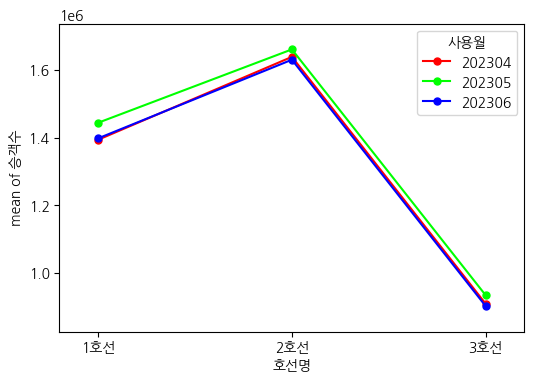

In [45]:
from statsmodels.graphics.factorplots import interaction_plot
line = data['호선명']
month = data['사용월']
passenger =data['승객수']
fig, ax = plt.subplots(figsize=(6,4))
fig = interaction_plot(line, month, passenger,  ms=10, ax=ax) #설정 가능한 인자 : colors=['red', 'blue', '~'], markers=['D', '^', '~'],
# 상호작용 그래프에서 선들이 서로 교차하고 있을 시 x축에 있는 독립변수(#호선명)와 그래프에서 시각화된 독립변수(#사용월) 간에는 상호작용이 존재한다고 해석할 수 있다.
# 교차하고 있는 선들이 없으므로 상호작용이 존재하지 않는다.

In [29]:
###  pg.anova 와 anova_lm 모두 같은 결과를 갖는 것을 확인할 수 있다.
### 사용월과 호선명간의 상호작용 효과에 대한 검정결과, p_value는 0.0999로 0.05보다 크므로 귀무가설을 기각하지 않는다.
###  따라서, 사용월과 호선명 간에는 교호작용이 존재하지 않는다는 것을 알 수 있다.

##### step2. 주효과 검정1,2

In [29]:
### 두 변수 모두 p-value가 아주 작음을 확인할 수 있으며 모두 승객수에 유의미한 영향을 끼치는 변수임을 확인할 수 있다.
### 사용월 변수에 대한 p-value가 0.9로 유의확률 0.05보다 크므로 승객수간 유의미한 차이가 존재하지 않는다.
### 호선명에 대한 p-value가 유의확률 0.05보다 작으므로 승객수간 유의미한 차이가 존재한다.

In [ ]:
### 정리하자면, 만약 두 종속변수가 정규성과 등분산성을 모두 만족해서 이원분산분석을 진행했다고 가정할 때
### 두 독립변수가 상호작용 효과가 없으므로 주효과 검정을 진행할 수 있고
### 한 독립변수에 대해서만 종속변수에 유의미한 평균차이가 있음을 확인하였다.

### 사후분석
- 각 독립변수 별 진행함.
- 귀무가설 : 집단들 사이의 평균은 같다.
- 연구가설 : 집단들 사이의 평균은 같지 않다.

> 각 집단별 표본의 크기가 다른 경우 scheffe 방법을 이용한 사후분석을 시행
- 일반적인 방법. 등분산성 가정 필요 없음
- scikit_posthocs.posthoc_scheffe(data, val_col, group_col)

> 각 집단별 표본의 크기가 동일한 경우 Tukey의 정직유의차(HSD) 를 이용한 사후분석 시행
- 보통 유의수준0.1이상 가정하며 가장 정직하게 검정. 등분산성 가정 필요 없음
- 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중비교를 수행함
- 두 집단 비교에 대해 모두 수정된 p-value 값이 0.05보다 작다면 각각의 비교에 대한 귀무가설을 모두 기각한다. 즉, 모든 집단에 대해서 종속변수 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있음
- 더 정교하게 해석하고 싶다면 diff 컬럼 차이(오른쪽 집단-왼쪽 집단, group2-group1)를 살펴봄. diff의 평균이 0보다 작으면 왼쪽 집단 group1의 통계적으로 유의하게 큰 값을 가진다고 해석 할 수 있음.
```
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc= MultiComparison(data=data["독립변수1"], groups=data["종속변수"])
tuekeyhsd= mc.tukeyhsd(alpha=0.05)
fig=tuekeyhsd.plot_simultaneous()
tuekeyhsd.summary()


> 만약 등분산성이 가정된 경우  Fisher의 최소유의차(LSD) 또는 Ducan의 MRT 를 이용한 사후분석 진행

In [55]:
data.호선명.value_counts()
# 각 범주별로 표본크기가 다르므로 scheffe 방법을 사용하겠다.

2호선    150
3호선    102
1호선     30
Name: 호선명, dtype: int64

In [49]:
import scikit_posthocs
scikit_posthocs.posthoc_scheffe(data,val_col='승객수', group_col='호선명')
### p_value값을 살펴보았을 때, 유의수준 0.05를 기준으로 1호선-2호선은 0.047, 1호선-3호선은 0.004, 2호선-3호선은 0.05이하이다.
### 즉 1호선,2호선,3호선 그룹 간 모두 승객수 차이가 유의하게 나타났다.

,1호선,2호선,3호선
1호선,1.000000,4.724754e-01,4.168418e-02
2호선,0.472475,1.000000e+00,4.121223e-08
3호선,0.041684,4.121223e-08,1.000000e+00


# 결과최종답

문제 출제 의도 : **푸는 과정(일원,이원)**을 보기 위함으로 문항별 결론은 일치할 수 있음

> 1. 사용월, 호선명 두 독립변수에 대한 **정규성과 등분산성을 만족하는지** 확인하라
  - 사용월 독립변수는 정규성을 만족하고, 등분산성을 만족한다.
  - 호선명 독립변수는 정규성을 만족하고, 등분산성을 만족하지 않는다.

> 2. **두 독립변수 모두 정규성을 만족하지 않는다고 가정하고** 집단간 평균에 차이가 존재하는지 확인하라.
 - 사용월에 따라서 승객수가 관련이 없다.
 - 호선에 따라서 승객수가 관련이 있다.

> 3. 호선명 독립변수가 **정규성은 만족하되 등분산성을 만족하지 않다고 가정하고** 호선별 평균에 차이가 존재하는지 확인하라.
 -  호선에 따라서 승객수 차이가 있다.

> 4. 두 독립변수가 모두 **정규성과 등분산성을 만족한다고 가정하고** 아래 지시를 따르라.
>> 1. 교호작용 효과를 검정하라.
  - 사용월과 호선명의 상호작용이 존재하지 않는다.
  2. 주효과 검정을 시행하라.
  - 사용월에 따른 총 승객수의 차이는 없다.
  - 호선명에 따른 총 승객수 차이가 존재한다.
  3. 호선명에 대한 사후분석을 진행하라.
 - 1,2,3 호선 그룹 간 모두 승객수 차이가 유의하게 나타난다.